# Problemstilling: Hvilken by har best vær - Trondheim eller Oslo?

Dette er kanskje en triviell problemstilling, men her har vi en mulighet til å utforske ulike visualiseringsmuligheter av et enkelt dataset ved hjelp av seaborn og pandas. 
Her tar jeg hensyn til nedbør, temperatur, vind, og "wind chill", og vil se på det samledet bildet hvilken by som har best vær. 
Jeg vil legge følgende kriterier til grunn for å avgjøre hvilken by som kommer best ut av det:
- Temperatur: Høyere er bedre
- Vind: Lavere er bedre
- Nedbør: Lavere er bedre
- Wind Chill (opplevd kulde på huden): Høyere er bedre

Disse kriteriene er subjektive og vil muligens ikke legge til grunn for et bærekraftig og naturlig klima for regionen.

Thomas Parelius, Vår 2023

Kilde: seklima.met.no

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style="darkgrid")

In [2]:
fold = 'C:/Users/Thomas/Documents/Python/værProsjekt'
df = pd.read_excel('Osl-Trd-5år.xlsx')
df = df.drop([120])
#df.head()
#df.tail()

Litt opprydding av dataframe følger:

In [3]:
df = df.rename(columns={'Tid(norsk normaltid)': 'Tid','Middeltemperatur (mnd)' : 'Temp', 'Nedbør (mnd)' : 'Nedbør', 'Høyeste middelvind (mnd)' : 'Vind'})

df["Tid"] = df.Tid.astype('str')

df["Vind"] = df["Vind"].replace("-",0)

df[["Mnd","År"]]= df.Tid.str.split(".", expand=True)
df[["By","Plass"]]= df.Navn.str.split(" - ", expand=True)

df["År"]= df["År"].replace('202','2020')

df = df.drop(columns=["Navn", "Plass", "Stasjon", "Tid"])
df = df[["By", "År", "Mnd", "Temp", "Nedbør", "Vind"]]

# Plots: Nedbør

Text(0.5, 1.0, 'Gjennomsnittlig nedbør per måned')

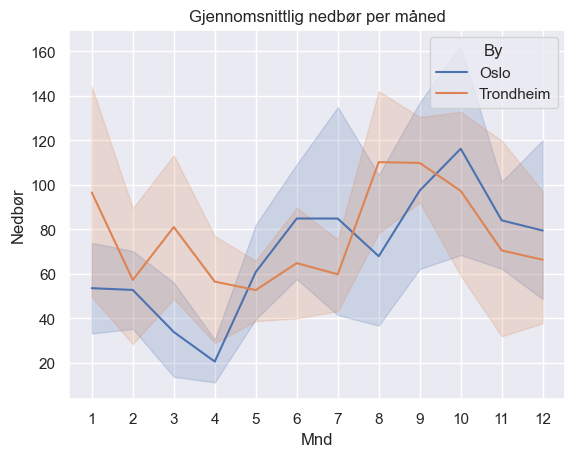

In [4]:
sns.lineplot(x="Mnd", y="Nedbør", data = df, hue="By")
plt.title("Gjennomsnittlig nedbør per måned")

Her kan vi se at Trondheim har mer nedbør enn Oslo mellom januar og mai, samt noen måneder på sensommeren og tidlig høst. Oslo har mer nedbør på sommeren og på slutten av året, men ikke med stor margin.
Noe vi kan se tydeligere i følgende boxplot:

Text(0.5, 1.0, 'Gjennomsnittlig nedbør per måned')

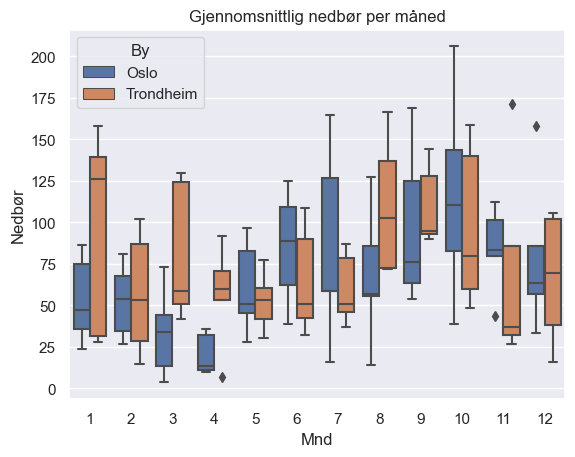

In [5]:
sns.boxplot(x="Mnd", y="Nedbør", data = df, hue="By")
#plt.suptitle('Nedbør')
plt.title("Gjennomsnittlig nedbør per måned")

Den lavere nedbørsmengden i kalde måneder vil telle i Oslos favør med tanke på "Wind Chill Index" (som vil bli beregnet senere), der lave temperaturer fører til lav Wind Chill.

# Plots: Temperatur

Text(0.5, 1.0, 'Gjennomsnittlig temperatur per måned')

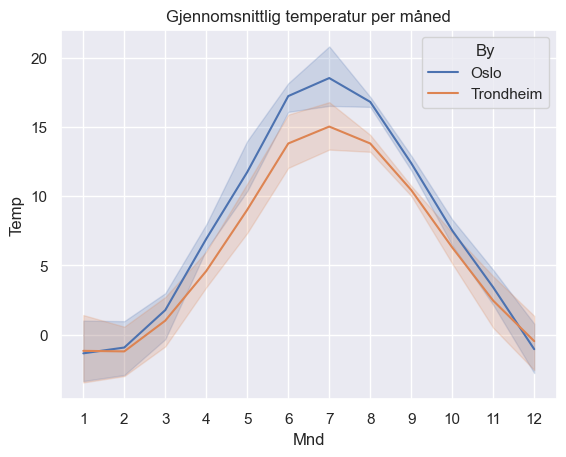

In [6]:
sns.lineplot(x="Mnd", y="Temp", data = df, hue="By")
plt.title("Gjennomsnittlig temperatur per måned")

Kan lese ganske tydelig fra plottet at Oslo er en varmere by enn Trondheim, ikke til stor overraskelse. Følgende boxplot er litt smør på flesk, men vi ser ganske tydelig at Oslo er en relativt mye varmere by spesielt i sommermånedene, med potensielt høy middeltemperatur.

<Axes: xlabel='Mnd', ylabel='Temp'>

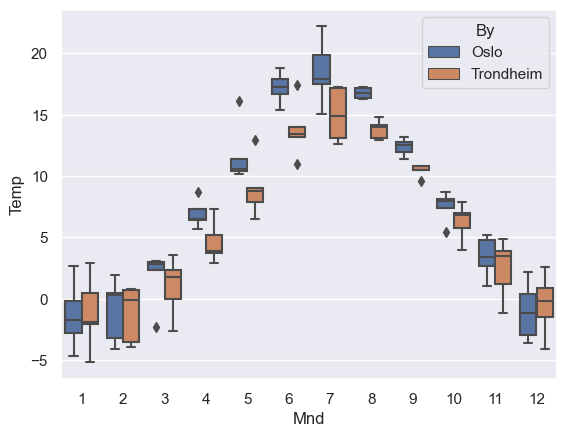

In [7]:
sns.boxplot(data=df, x="Mnd", y="Temp", hue="By")

# Plots: Vind

NB: Datasettet manglet verdier for vind i Trondheim i januar 2018 og desember 2018, dette vil føre til misvisende plots. Jeg ønsket ikke å gjøre antagelser om hvilke verdier som burde vært der, så verdiene er satt til 0.

Text(0.5, 1.0, 'Gjennomsnittlig vind per måned')

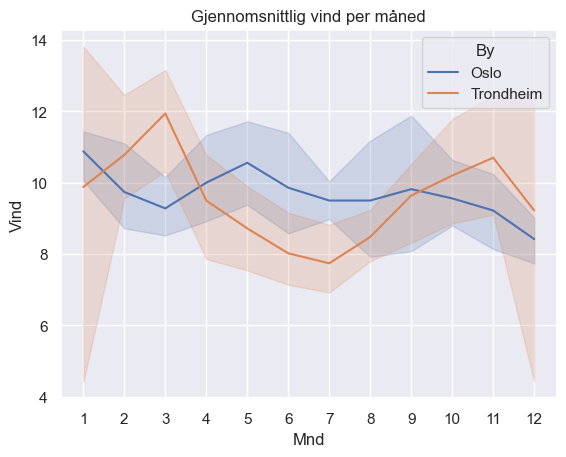

In [8]:
sns.lineplot(x="Mnd", y="Vind", data = df, hue="By")
plt.title("Gjennomsnittlig vind per måned")

Text(0.5, 1.0, 'Gjennomsnittlig vind per måned')

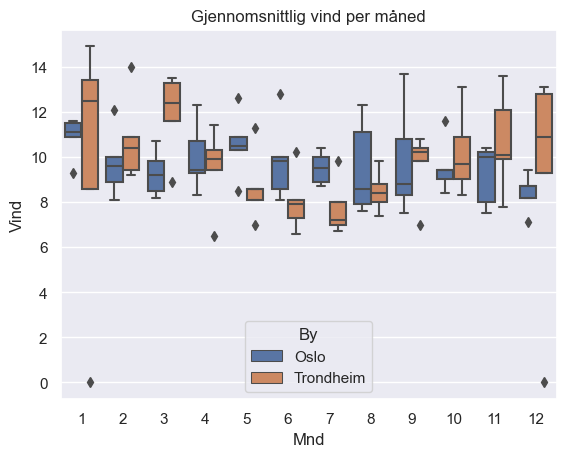

In [9]:
sns.boxplot(x="Mnd", y="Vind", data = df, hue="By")
plt.title("Gjennomsnittlig vind per måned")

Minimumsverdier i januar og desember for Trondheim er som sagt misvisende, men til tross for dette kan vi se at Trondheim har mer vind enn Oslo mellom september og april. Oslo har mer vind om sommeren men det telles ikke like negativt som den kjølige vintervinden.

# Plots: Wind Chill Index

Text(0.5, 1.0, 'Wind Chill Index per måned')

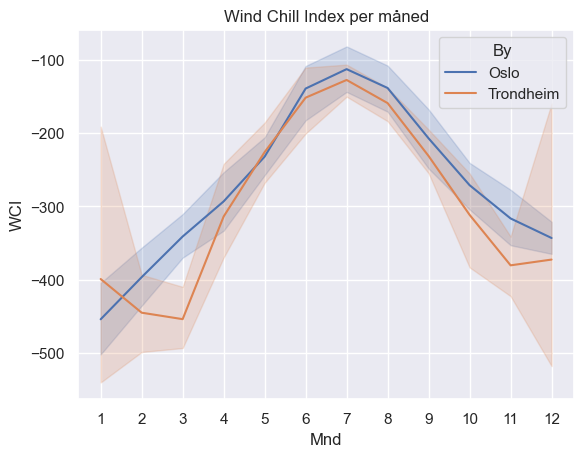

In [10]:
df["WCI"] = (13.12) + (0.6215* df["Temp"]) - (11.37*df["Vind"]*3.6) + (0.3965*df["Temp"]*df["Vind"]*3.6)
#Kilde: https://en.wikipedia.org/wiki/Wind_chill#North_American_and_United_Kingdom_wind_chill_index

sns.lineplot(x="Mnd", y = "WCI", data=df, hue= "By")
plt.title("Wind Chill Index per måned")

Text(0.5, 1.0, 'Wind Chill Index per måned')

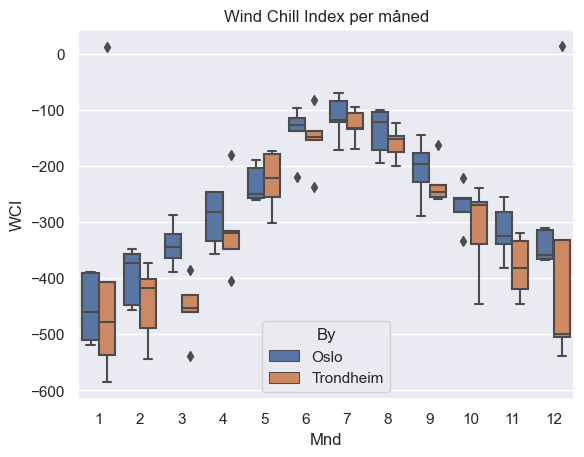

In [11]:
sns.boxplot(x="Mnd", y = "WCI", data=df, hue= "By")
plt.title("Wind Chill Index per måned")

Her kan vi forholdsvis klart tyde at Oslo er en by med høyere Wind Chill Index og dermed vil oppleves som varmere. Wind Chill Index er et nyttig begrep for å sammenfatte temperatur og vind en lettforståelig indeks, der lave verdier betyr at vind og vær oppleves som kaldere enn ved høyere temperaturer.

# Ytterligere beregninger:

Text(0.5, 1.0, 'Wind Chill Index over gjennomsnittet')

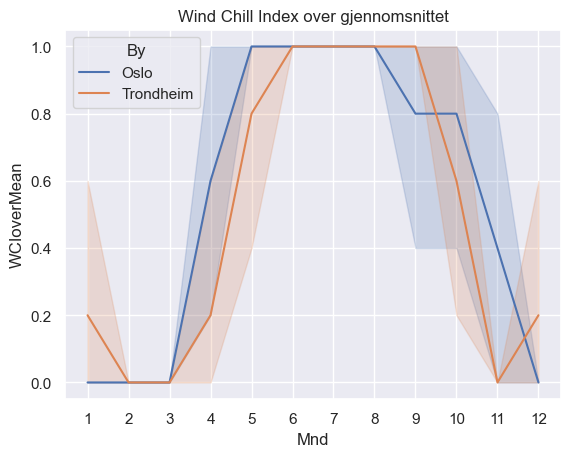

In [12]:
df["WCIoverMean"]= df["WCI"]>df["WCI"].mean()
sns.lineplot(x="Mnd", y="WCIoverMean", data=df, hue="By")
plt.title("Wind Chill Index over gjennomsnittet")

Text(0.5, 1.0, 'Nedbør under gjennomsnittet')

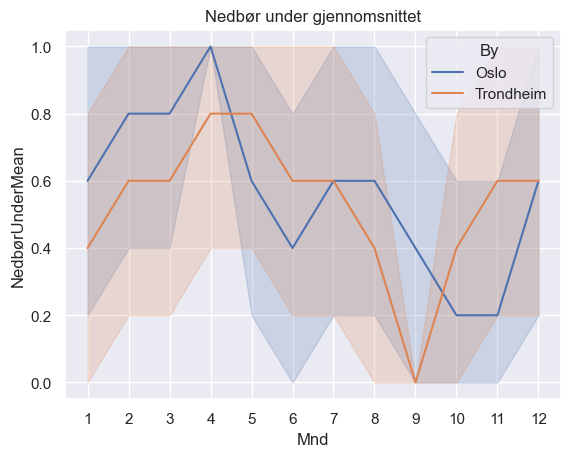

In [13]:
df["NedbørUnderMean"]= df["Nedbør"]<df["Nedbør"].mean()
sns.lineplot(x="Mnd", y = "NedbørUnderMean", data=df, hue="By")
plt.title("Nedbør under gjennomsnittet")

Text(0.5, 1.0, 'Temperatur over gjennomsnittet')

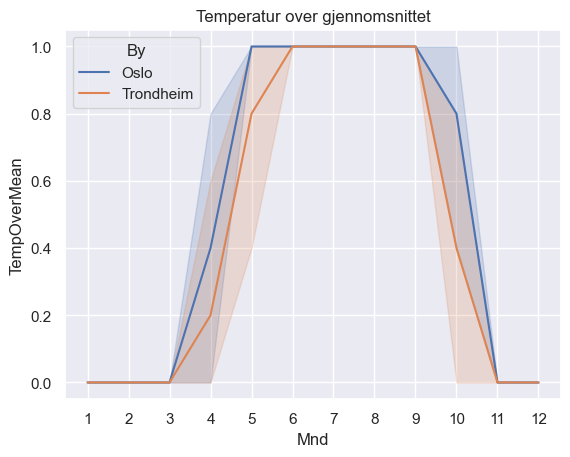

In [14]:
df["TempOverMean"]= df["Temp"]>df["Temp"].mean()
sns.lineplot(data=df, x="Mnd", y="TempOverMean", hue="By")
plt.title("Temperatur over gjennomsnittet")

<Axes: xlabel='Mnd', ylabel='VindUnderMean'>

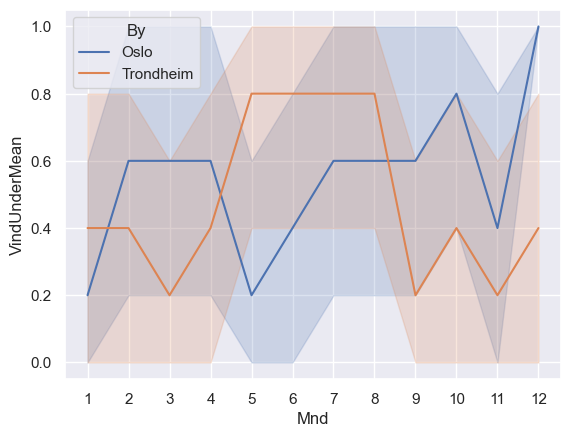

In [15]:
df["VindUnderMean"] = df["Vind"]<df["Vind"].mean()
sns.lineplot(data= df, x="Mnd", y="VindUnderMean", hue="By")

In [16]:
#Antall dager i hver by som har mindre nedbør enn gjennomsnittet
osloNedbørUnder = df.loc[ (df["By"]=="Oslo") & (df["NedbørUnderMean"]==True) ]
trdNedbørUnder = df.loc[ (df["By"]=="Trondheim") & (df["NedbørUnderMean"]==True) ]

#Prosent av dagene som har mindre nedbør enn gjennomsnittet
osloNedbørProsent = 100* len(osloNedbørUnder)/len(df.loc[ (df["By"]=="Oslo")])
trdNedbørProsent = 100* len(trdNedbørUnder)/len(df.loc[ (df["By"]=="Trondheim")])
print("Prosent av dagene som har mindre nedbør enn gjennomsnittet: ")
print("Oslo: ", osloNedbørProsent)
print("Trondheim: ", trdNedbørProsent)

Prosent av dagene som har mindre nedbør enn gjennomsnittet: 
Oslo:  56.666666666666664
Trondheim:  53.333333333333336


Ergo har du større sjans å få mindre regn enn gjennomsnittet hvis du er i Oslo.

In [17]:
#Antall dager i hver by som har høyere WCI enn gjennomsnittet
osloWCIover = df.loc[ (df["By"]=="Oslo") & (df["WCIoverMean"]==True) ]
trdWCIover = df.loc[ (df["By"]=="Trondheim") & (df["WCIoverMean"]==True) ]

#Prosent av dagene som har høyere WCI enn gjennomsnittet
osloWCIprosent = 100*len(osloWCIover)/len(df.loc[ (df["By"]=="Oslo")])
trdWCIprosent = 100*len(trdWCIover)/len(df.loc[ (df["By"]=="Trondheim")])

print("Prosent av dagene som har høyere Wind Chill Index enn gjennomsnittet: ")
print("Oslo: ", osloWCIprosent)
print("Trondheim: ", trdWCIprosent)

Prosent av dagene som har høyere Wind Chill Index enn gjennomsnittet: 
Oslo:  55.0
Trondheim:  50.0


Ergo har du større sjanse å oppleve høyere Wind Chill Index, altså varmere opplevd vær, i Oslo enn i Trondheim.

In [18]:
#Prosent av total nedbør fra hver by
sumRegn = df["Nedbør"].sum()
sumRegnOsl = df.loc[ df["By"]=="Oslo", "Nedbør"].sum()
sumRegnTrd = df.loc[ df["By"]=="Trondheim", "Nedbør"].sum()

print("Prosent av den totale nedbøren som kom fra Oslo: ")
print(100*sumRegnOsl/sumRegn)

print("Prosent av den totale nedbøren som kom fra Trondheim: ")
print(100*sumRegnTrd/sumRegn)

Prosent av den totale nedbøren som kom fra Oslo: 
47.54034964000955
Prosent av den totale nedbøren som kom fra Trondheim: 
52.45965035999044


Ergo har du totalt mindre regn i Oslo enn i Trondheim.

# Oppsummering:

Basert på data fra 2018-2022 kan jeg trekke noen konklusjoner. På det hele er ikke været så enorm ulikt, da de begge er kyustbyer i nord-europa, men det er flere målinger som ender opp i Oslos favør:
- Det er mindre regn i Oslo, spesielt i de kalde månedene.
- Det er høyere temperaturer i Oslo, året rundt.
- Det er mindre vind i Oslo i de kalde månedene.
- Oslo har også høyere Wind Chill Index så og si året rundt.

Så hvis valget står mellom Oslo og Trondheim, og livskvaliteten din i stor grad er avhengig av været, så ville jeg på grunnlag av beregningene gjort i dette prosjektet anbefalt Oslo. Det er nok mange flere variabler man kan ta hensyn til men jeg synes dette gir en grei pekepinn.